<a href="https://colab.research.google.com/github/avikumart/LLM-GenAI-Transformers-Notebooks/blob/main/DeepLearningFiles/Building_NN_models_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch Basics / Tensor operations

1. [source:](https://www.kaggle.com/code/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)

2. [G4G docs](https://www.geeksforgeeks.org/start-learning-pytorch-for-beginners/)

In [1]:
import numpy as np
import torch

In [2]:
arr = np.array([[23,34,56,2],
                [12,41,52,5]])
arr

array([[23, 34, 56,  2],
       [12, 41, 52,  5]])

In [3]:
tensor = torch.tensor(arr)
tensor

tensor([[23, 34, 56,  2],
        [12, 41, 52,  5]])

In [4]:
type(tensor)

torch.Tensor

In [5]:
# some random pytorch tensors
torch.rand(4,3)

tensor([[0.4359, 0.1772, 0.1798],
        [0.3742, 0.1567, 0.1454],
        [0.1976, 0.6318, 0.3414],
        [0.6540, 0.9301, 0.4885]])

In [6]:
torch.ones(4,4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [7]:
ten = torch.from_numpy(arr)
ten

tensor([[23, 34, 56,  2],
        [12, 41, 52,  5]])

In [8]:
arr1 = ten.numpy()
arr1

array([[23, 34, 56,  2],
       [12, 41, 52,  5]])

In [9]:
tensor = torch.ones(3,4)
tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [10]:
# addition
torch.add(tensor,tensor)

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

In [11]:
torch.sub(tensor,tensor)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [12]:
torch.mul(tensor,tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [13]:
tensor.mean()

tensor(1.)

In [14]:
# import variable form pytorch library
from torch.autograd import Variable

var = Variable(torch.rand(3,4),requires_grad=True)
var

tensor([[0.4910, 0.1859, 0.4139, 0.7076],
        [0.6373, 0.1643, 0.2796, 0.2785],
        [0.5831, 0.9059, 0.3838, 0.9612]], requires_grad=True)

In [15]:
# backward propagation of the equation y = x^2
array = [2,4]
tensor = torch.Tensor(array)

x = Variable(tensor,requires_grad=True)
y = x**2

print("y  :",y)

o = (1/2)*sum(y)
print("o  :",o)

o.backward()
print("x.grad  :",x.grad)

y  : tensor([ 4., 16.], grad_fn=<PowBackward0>)
o  : tensor(10., grad_fn=<MulBackward0>)
x.grad  : tensor([2., 4.])


## Linear regression model using pytorch

In [16]:
# generate dummay x and y data
x = np.random.rand(100,1)
y = 2 + 3*x + np.random.rand(100,1)

# convert to the tensor
ten_x = torch.Tensor(x)
ten_y = torch.Tensor(y)

# make the data optimizable
ten_x = Variable(ten_x,requires_grad=True)
ten_y = Variable(ten_y)

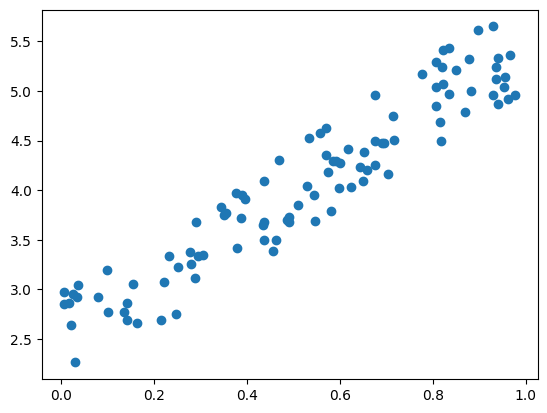

In [17]:
# plot the chart of the x and y
import matplotlib.pyplot as plt
plt.scatter(ten_x.data.numpy(),ten_y.data.numpy())

In [18]:
# Build the linear regression model
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.optim import SGD

# create the linear regression class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_size,output_size)

    def forward(self,x):
      x = self.linear(x)
      return x

In [19]:
# define the model
model = LinearRegression(1,1)

# define the loss
loss_fn = nn.MSELoss()

# define the optimizer
optimizer = SGD(model.parameters(),lr=0.01)

In [20]:
# train the model
loss_list = []
epochs = 10002
for epoch in range(epochs):
  optimizer.zero_grad()
  results = model(ten_x)
  loss = loss_fn(results,ten_y)
  loss.backward()
  optimizer.step()
  loss_list.append(loss.data)
  if epoch % 50 == 0:
    print(f"epoch: {epoch}, loss: {loss.data}")

epoch: 0, loss: 23.446332931518555
epoch: 50, loss: 1.7752615213394165
epoch: 100, loss: 0.20679788291454315
epoch: 150, loss: 0.09237940609455109
epoch: 200, loss: 0.08323995769023895
epoch: 250, loss: 0.08181694895029068
epoch: 300, loss: 0.08104223012924194
epoch: 350, loss: 0.08039392530918121
epoch: 400, loss: 0.07982474565505981
epoch: 450, loss: 0.07932315766811371
epoch: 500, loss: 0.07888093590736389
epoch: 550, loss: 0.07849103212356567
epoch: 600, loss: 0.07814721763134003
epoch: 650, loss: 0.07784412056207657
epoch: 700, loss: 0.07757687568664551
epoch: 750, loss: 0.07734129577875137
epoch: 800, loss: 0.07713355123996735
epoch: 850, loss: 0.07695035636425018
epoch: 900, loss: 0.07678885757923126
epoch: 950, loss: 0.07664647698402405
epoch: 1000, loss: 0.07652091979980469
epoch: 1050, loss: 0.07641022652387619
epoch: 1100, loss: 0.07631263881921768
epoch: 1150, loss: 0.0762265995144844
epoch: 1200, loss: 0.07615074515342712
epoch: 1250, loss: 0.07608383893966675
epoch: 1300,

## Logistic regression using pytorch

In [21]:
import torch.optim as optimize
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# train and test split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# convert the dataet into pytorch tensors
train_X = torch.Tensor(X_train)
train_y = torch.Tensor(y_train)

test_X = torch.Tensor(X_test)
test_y = torch.Tensor(y_test)

In [22]:
# define the model
class LogReg(nn.Module):
  def __init__(self, input_dim,hidden_size, output_dim):
    super(LogReg,self).__init__()
    self.fc1 = nn.Linear(input_dim,hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size,output_dim)

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [23]:
input_dim = train_X.shape[1]
hidden_size = 15
output_dim = len(iris.target_names)

# create the model
model = LogReg(input_dim,hidden_size,output_dim)

# define the loss
loss_fn = nn.CrossEntropyLoss()

# define the optimizer
optimizer = optimize.Adam(model.parameters(),lr=0.01)

In [24]:
# train the model
num_epochs = 1000
for e in range(num_epochs):
  # start the optimizer
  optimizer.zero_grad()
  outputs = model(train_X)
  loss = loss_fn(outputs,train_y.long()) # does the softmax and calculates the loss function
  loss.backward()
  optimizer.step()
  if e%10 == 0:
    print(f"epoch: {e}, loss: {loss.item()}")

epoch: 0, loss: 1.024781346321106
epoch: 10, loss: 0.6306218504905701
epoch: 20, loss: 0.41752663254737854
epoch: 30, loss: 0.3258104920387268
epoch: 40, loss: 0.2584036886692047
epoch: 50, loss: 0.2011742889881134
epoch: 60, loss: 0.15425674617290497
epoch: 70, loss: 0.1196746677160263
epoch: 80, loss: 0.09812083840370178
epoch: 90, loss: 0.08410200476646423
epoch: 100, loss: 0.07501719146966934
epoch: 110, loss: 0.0689409002661705
epoch: 120, loss: 0.06453175842761993
epoch: 130, loss: 0.0611845925450325
epoch: 140, loss: 0.0585487000644207
epoch: 150, loss: 0.05640735104680061
epoch: 160, loss: 0.05462953820824623
epoch: 170, loss: 0.053128328174352646
epoch: 180, loss: 0.05185503512620926
epoch: 190, loss: 0.05077585205435753
epoch: 200, loss: 0.049834802746772766
epoch: 210, loss: 0.049020152539014816
epoch: 220, loss: 0.04830692335963249
epoch: 230, loss: 0.04767972230911255
epoch: 240, loss: 0.0471285842359066
epoch: 250, loss: 0.046640824526548386
epoch: 260, loss: 0.0462094657

In [25]:
# evaluation of the model
with torch.no_grad():
  outputs = model(test_X)
  _, predicts = torch.max(outputs,1)
  acc = (predicts == test_y).sum().item() / test_y.size(0)
  print(f"accuracy: {acc}")

accuracy: 1.0


## ANN modeling using PyTorch on MNIST digit classification dataset

In [26]:
# import the mnist dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# load the dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.56MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 14.7MB/s]


In [32]:
# batch size and epochs
batch_size = 50
epochs = 3

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

In [33]:
# define the model for the image classification
class ANNModel(nn.Module):
  def __init__(self, input, hidden, output):
    super(ANNModel,self).__init__()
    # ann model layers
    self.fc1 = nn.Linear(input,hidden)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(hidden,hidden)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(hidden,hidden)
    self.tanh = nn.Tanh()
    self.fc4 = nn.Linear(hidden,output)

  def forward(self, x):
    # forward pass to the model
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    x = self.fc3(x)
    x = self.tanh(x)
    x = self.fc4(x)
    return x

In [34]:
# set the the input dim and output dim
input = 28*28
output = 10
hidden = 100

# model
clf_model = ANNModel(input,hidden,output)

# loss
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(clf_model.parameters(),lr=0.001)

In [36]:
# train the model
count = 0
loss_li = []
iteration_li = []
accuracy_li = []
for epoch in range(epochs):
  for idx, (images,labels) in enumerate(train_loader):

    train_data = Variable(images.view(-1, 28 * 28))
    labels = labels

    # train the model and store the loss and acc in the list
    optimizer.zero_grad()
    outputs = clf_model(train_data)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    count += 1
  if count % 5 == 0:
    correct = 0
    total = 0
    for (images,labels) in test_loader:
      test_data = Variable(images.view(-1, 28*28))
      outputs = clf_model(test_data)
      prediction = torch.max(outputs.data,1)
      total += labels.size(0)
      correct += (prediction[1] == labels).sum()
    accuracy1 = 100 * correct / total
    loss_li.append(loss.data)
    iteration_li.append(count)
    accuracy_li.append(accuracy1)
  if count % 10 ==0:
      print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count,loss.item(),accuracy1))

Iteration: 1200, Loss: 0.010333175770938396, Accuracy: 97.51000213623047%
Iteration: 2400, Loss: 0.016702312976121902, Accuracy: 97.2699966430664%
Iteration: 3600, Loss: 0.0982096791267395, Accuracy: 97.48999786376953%
